In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "_paper_2"
    cd(joinpath(@__DIR__, "../../"))
    Pkg.activate("Project.toml")
end

using MorphoMolNotebooks
using MorphoMol

using StaticArrays
using Rotations
using Distances
using LinearAlgebra
using CairoMakie
using JLD2

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`


In [2]:
mol_type = "6sae"
@load "notebooks/_paper_2/input/2_$(mol_type)_assembly.jld2" input output
n = length(output["Es"])
e_mindex = argmin(output["Es"])
range = e_mindex-600:minimum([e_mindex + 50, n])

Vs = output["Vs"][range]
As = output["As"][range]
Cs = output["Cs"][range]
Xs = output["Xs"][range]
OLs = output["OLs"][range]
Es = output["Es"][range]

exp_template_centers = MorphoMol.Utilities.TWOTMVSU_EXPERIMENTAL_ASSEMBLY[mol_type]["template_centers"]
exp_state = MorphoMol.Utilities.TWOTMVSU_EXPERIMENTAL_ASSEMBLY[mol_type]["state"]
Ds = [MorphoMol.Utilities.average_offset_distance(exp_template_centers, input["template_centers"], exp_state, state) for state in output["states"][range]];

In [3]:
argmin(Cs)

542

In [4]:
overlap_slope = input["overlap_slope"]

1.0

In [5]:
mc_mindex = argmin(Cs)
E_mindex = argmin(Es)

601

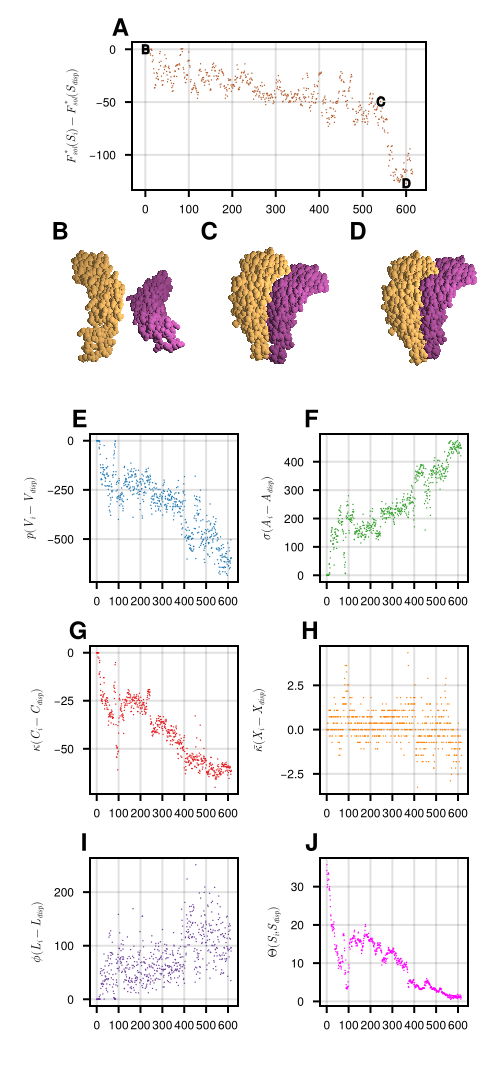

In [8]:
paired_colors = cgrad(:Paired_12, 12, categorical = true)
xs = 0:length(Vs)-1
pf = MorphoMol.Energies.get_prefactors(1.4, 0.3665)

pt_per_in = 72
width =  3.42
height = 7.5
f_size = (pt_per_in * width, pt_per_in * height)
fs = 6
border_width = 0.5
fig = Figure(size = f_size, fontsize = fs)

colsize = f_size[1] * 0.6
png_dimension = colsize / 2.5
plot_width = colsize / 2.0
plot_height = colsize / 2.0
pad = 1
ms = 1

ga = fig[1, 1:6] = GridLayout()
ax, _ = scatter(ga[1, 1], xs, Es .- Es[1], markersize = ms, color = paired_colors[12], 
axis = (ylabel = L"F^*_{sol}(S_i) - F^*_{sol}(S_{disp})", ylabelrotation = pi/2, width = 2 * plot_width, height = plot_height,xticksize = 3.0, yticksize = 3.0,)
)

sw = 0.7
scatter!(ax, [1], [Es[1] - Es[1]], markersize = 6, marker = 'B', color = :black, strokewidth = sw)
scatter!(ax, [mc_mindex], [Es[mc_mindex] - Es[1]], markersize = 6, marker = 'C', color = :black, strokewidth = sw)
scatter!(ax, [E_mindex], [Es[E_mindex] - Es[1]], markersize = 6, marker = 'D', color = :black, strokewidth = sw)

spacing_color = :transparent
g_box = fig[2, 1:6] = GridLayout()
Box(g_box[1, 1], width = 50, height = plot_height * 1.2,  color = spacing_color, strokewidth = 0)

gb = fig[2, 1:2] = GridLayout()
img = load("notebooks/_paper_2/pngs/2/mp_1.png")
ax, _ = image(gb[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gc = fig[2, 3:4] = GridLayout()
img = load("notebooks/_paper_2/pngs/2/mp_2.png")
ax, _ = image(gc[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )

hidespines!(ax)
hidedecorations!(ax)

gd = fig[2, 5:6] = GridLayout()
img = load("notebooks/_paper_2/pngs/2/mp_3.png")
ax, _ = image(gd[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )

hidespines!(ax)
hidedecorations!(ax)

spacing_color = :transparent
g_box = fig[3, 1:6] = GridLayout()
Box(g_box[1, 1], width = 50,  color = spacing_color, strokewidth = 0)

ge = fig[3, 1:3] = GridLayout()
scatter(ge[1, 1], xs, pf[1] .* (Vs .- Vs[1]) , markersize = ms, color = paired_colors[2], 
axis = (ylabel = L"p(V_i - V_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height, xticksize = 3.0, yticksize = 3.0,)
)

gf = fig[3, 4:6] = GridLayout()
scatter(gf[1, 1], xs, pf[2] .* (As .- As[1]), markersize = ms, color = paired_colors[4], 
axis = (ylabel = L"\sigma (A_i - A_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height, xticksize = 3.0, yticksize = 3.0,)
)

gg = fig[4, 1:3] = GridLayout()
scatter(gg[1, 1], xs, pf[3] .* (Cs .- Cs[1]), markersize = ms, color = paired_colors[6], 
axis = (ylabel = L"\kappa (C_i - C_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height, xticksize = 3.0, yticksize = 3.0,)
)

gh = fig[4, 4:6] = GridLayout()
scatter(gh[1, 1], xs, pf[4] .* (Xs .- Xs[1]), markersize = ms, color = paired_colors[8], 
axis = (ylabel = L"\overline{\kappa} (X_i - X_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height,xticksize = 3.0, yticksize = 3.0,)
)

gi = fig[5, 1:3] = GridLayout()
scatter(gi[1, 1], xs, overlap_slope .* OLs, markersize = ms, color = paired_colors[10], 
axis = (ylabel = L"\phi(L_i - L_{disp})", ylabelrotation = pi/2,  width = plot_width, height = plot_height,xticksize = 3.0, yticksize = 3.0,)
)

gj = fig[5, 4:6] = GridLayout()
scatter(gj[1, 1], xs, Ds, markersize = ms, color = :magenta, 
axis = (ylabel = L"\Theta(S_i, S_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height,xticksize = 3.0, yticksize = 3.0,)
)

for (label, layout) in zip(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"], [ga, gb, gc, gd, ge, gf, gg, gh, gi, gj])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 12,
        font = :bold,
        padding = (0, pad, pad, 0),
        halign = :right)
end

rowsize!(fig.layout, 1, Relative(0.1))
rowgap!(fig.layout, 0)

rowgap!(fig.layout, 5)
colgap!(fig.layout, 15)
save("notebooks/_paper_2/output/measure_paths.pdf", fig, pt_per_unit = 1)
fig